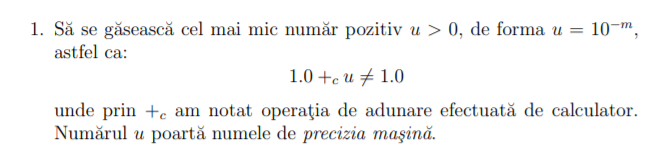

In [ ]:
u = 1
while( 1.0 + u != 1.0 ):
    u = u/10
print(f"Precizie masina = {u}")

Precizie masina = 1.0000000000000001e-16


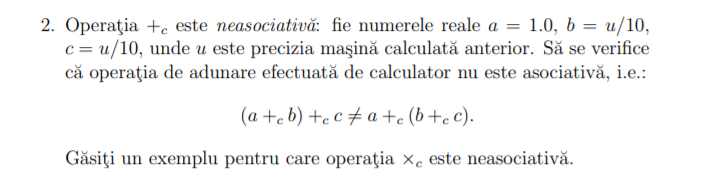

In [ ]:
u = u*10


a = 1.0
b = u/10
c = u/10
if  (a + b ) + c == a  + (b + c) :
    print("Operatia este asociativa")
else:
    print("Operatia nu este asociativa")

a=10
b=u
c=u

if (a * b) * c == a * (b * c):
    print("Operatia este asociativa")
else:
    print("Operatia nu este asociativa")

Operatia nu este asociativa
Operatia nu este asociativa


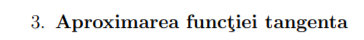

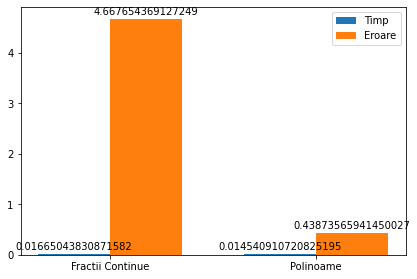

In [28]:
import math
import random
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def my_tan_1(x,Epsilon):
    mic = 10**(-12)
    f = mic
    C = f
    D = 0
    j = 1
    a=x
    while(True):
        b= 2* ( j-1) + 1
        j=j+1
        D = (b+2) + a * D
        if D == 0:
            D= mic
        C = (b+2) + a/C
        a = - x**2
        if C == 0:
            C= mic
        D = 1/D
        Delta = C * D
        f = Delta*f
        j = j + 1
        if abs(Delta - 1) >= Epsilon:
            return f


def my_tan_2(x):
    c1 = 0.33333333333333333
    c2 = 0.133333333333333333
    c3 = 0.053968253968254
    c4 = 0.0218694885361552
    x_2 = x * x
    x_3 = x_2 * x
    x_4 = x_2 * x_2
    return x + c1*x_3 + c2*x_4*x + c3*x_4*x_3 + c4*x_4*x_4*x


eroare = 0
start = time.time()
for i in range(0,10000):
    x = random.uniform(-math.pi / 2, math.pi / 2)
    if( x < 0 ) :
        mytan =-my_tan_1(-x, 10 ** (-8))
    else:
        mytan = my_tan_1(x, 10 ** (-8))
    eroare = abs(math.tan(x) - mytan) + eroare
end = time.time()
eroare_1 = eroare/10000
time_1 = end-start

eroare=0
start=time.time()

for i in range(0,10000):
    x = random.uniform(-math.pi / 4, math.pi / 4 )
    if( x < 0 ) :
        mytan =-my_tan_2(x)
    else:
        mytan = my_tan_2(x)

    eroare = abs( 1/math.tan(math.pi/2 - x) - mytan ) + eroare
end = time.time()

eroare_2= eroare/10000
time_2 = end-start

labels = ['Fractii Continue', 'Polinoame']
eroare = [eroare_1, eroare_2]
timp = [time_1,time_2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, timp, width, label='Timp')
rects2 = ax.bar(x + width / 2, eroare, width, label='Eroare')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()